In [1]:
import pandas as pd 
import numpy as np

In [2]:
import pandas as pd
from tqdm import tqdm

df_list = list()
chunk_iter = pd.read_csv(
    "../data/Total_Data_10Y_Top24.csv", 
    chunksize=100000, 
    dtype = {"CANCELLATION_CODE": str}
)
for chunk in tqdm(chunk_iter):
    df_list.append(chunk)
df = pd.concat(df_list)
df.head()

chunk = df
del df

130it [00:28,  4.61it/s]


In [3]:
chunk.dtypes

FL_DATE                   object
OP_UNIQUE_CARRIER         object
TAIL_NUM                  object
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN_CITY_MARKET_ID      int64
ORIGIN                    object
ORIGIN_CITY_NAME          object
DEST_AIRPORT_SEQ_ID        int64
DEST_CITY_MARKET_ID        int64
DEST                      object
DEST_CITY_NAME            object
DEP_TIME                 float64
DEP_DELAY                float64
TAXI_OUT                 float64
TAXI_IN                  float64
ARR_TIME                 float64
ARR_DELAY                float64
CANCELLED                float64
CANCELLATION_CODE         object
CARRIER_DELAY            float64
WEATHER_DELAY            float64
NAS_DELAY                float64
SECURITY_DELAY           float64
LATE_AIRCRAFT_DELAY      float64
dtype: object

In [4]:
#flight_data = chunk[["FL_DATE", "OP_UNIQUE_CARRIER", "TAIL_NUM", "ORIGIN_CITY_NAME", "DEST_CITY_NAME", "DEP_TIME", "DEP_DELAY", "ARR_TIME", "ARR_DELAY", "CANCELLED"]]
#flight_data


In [5]:
#flight_data.dtypes

In [6]:
chunk.loc[:, 'FL_DATE'] = pd.to_datetime(chunk['FL_DATE']).dt.date

In [96]:
flight_data.dtypes

Flight Date           object
OP_UNIQUE_CARRIER     object
TAIL_NUM              object
ORIGIN_CITY_NAME      object
DEST_CITY_NAME        object
DEP_TIME             float64
Departure Delay      float64
ARR_TIME             float64
Arrival Delay        float64
CANCELLED            float64
dtype: object

In [7]:
chunk.rename(columns={'FL_DATE': 'Flight Date', 'DEP_DELAY': 'Departure Delay', 'ARR_DELAY': 'Arrival Delay' }, inplace=True)

In [8]:
chunk.rename(columns={'DEP_TIME': 'Departure Time', 'ARR_TIME': 'Arrival Time'}, inplace=True)

In [9]:
chunk.head()

,Flight Date,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,...,TAXI_IN,Arrival Time,Arrival Delay,CANCELLED,CANCELLATION_CODE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2014-07-01,AA,N002AA,1105703,31057,CLT,"Charlotte, NC",1129803,30194,DFW,...,28.0,1214.0,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-07-01,AA,N002AA,1129803,30194,DFW,"Dallas/Fort Worth, TX",1105703,31057,CLT,...,13.0,945.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-07-01,AA,N004AA,1039705,30397,ATL,"Atlanta, GA",1129803,30194,DFW,...,6.0,1341.0,-9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-07-01,AA,N004AA,1129803,30194,DFW,"Dallas/Fort Worth, TX",1039705,30397,ATL,...,7.0,1159.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-07-01,AA,N004AA,1129803,30194,DFW,"Dallas/Fort Worth, TX",1039705,30397,ATL,...,6.0,2317.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#flight_data = chunk[["Flight Date", "OP_UNIQUE_CARRIER", "TAIL_NUM", "ORIGIN_CITY_NAME", "DEST_CITY_NAME", "DEP_TIME", "Departure Delay", "ARR_TIME", "Arrival Delay", "CANCELLED"]]
#flight_data

In [11]:
chunk.dtypes

Flight Date               object
OP_UNIQUE_CARRIER         object
TAIL_NUM                  object
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN_CITY_MARKET_ID      int64
ORIGIN                    object
ORIGIN_CITY_NAME          object
DEST_AIRPORT_SEQ_ID        int64
DEST_CITY_MARKET_ID        int64
DEST                      object
DEST_CITY_NAME            object
Departure Time           float64
Departure Delay          float64
TAXI_OUT                 float64
TAXI_IN                  float64
Arrival Time             float64
Arrival Delay            float64
CANCELLED                float64
CANCELLATION_CODE         object
CARRIER_DELAY            float64
WEATHER_DELAY            float64
NAS_DELAY                float64
SECURITY_DELAY           float64
LATE_AIRCRAFT_DELAY      float64
dtype: object

In [12]:
list(chunk.columns)

['Flight Date',
 'OP_UNIQUE_CARRIER',
 'TAIL_NUM',
 'ORIGIN_AIRPORT_SEQ_ID',
 'ORIGIN_CITY_MARKET_ID',
 'ORIGIN',
 'ORIGIN_CITY_NAME',
 'DEST_AIRPORT_SEQ_ID',
 'DEST_CITY_MARKET_ID',
 'DEST',
 'DEST_CITY_NAME',
 'Departure Time',
 'Departure Delay',
 'TAXI_OUT',
 'TAXI_IN',
 'Arrival Time',
 'Arrival Delay',
 'CANCELLED',
 'CANCELLATION_CODE',
 'CARRIER_DELAY',
 'WEATHER_DELAY',
 'NAS_DELAY',
 'SECURITY_DELAY',
 'LATE_AIRCRAFT_DELAY']

In [101]:
#chunk = chunk.set_index("Flight Date")
#chunk.head()

In [114]:
chunk.to_csv('flight_data.csv')

In [76]:
ls

 Volume in drive C is Windows 
 Volume Serial Number is F6AD-5824

 Directory of C:\Users\CEO\DATA  601\Project

2024-09-30  12:23 PM    <DIR>          .
2024-09-30  05:38 AM    <DIR>          ..
2024-09-29  09:26 PM    <DIR>          .ipynb_checkpoints
2024-09-30  12:24 PM         2,383,119 flight_data.csv
2024-09-30  12:16 PM         2,144,114 flight_data1.csv
2024-09-29  09:28 PM     1,746,696,033 Total_Data_10Y_Top23.csv
2024-09-30  12:23 PM            56,404 Untitled.ipynb
               4 File(s)  1,751,279,670 bytes
               3 Dir(s)  219,981,074,432 bytes free


In [13]:
flight_data = chunk
del chunk

In [14]:
import pandas as pd

# Assuming the flight data is already loaded into a DataFrame called flight_data
# Replace 'Departure Delay' and 'Arrival Delay' with actual column names in your dataset

# Convert the delay columns to numeric values to handle non-numeric values if any
flight_data['Departure Delay'] = pd.to_numeric(flight_data['Departure Delay'], errors='coerce')
flight_data['Arrival Delay'] = pd.to_numeric(flight_data['Arrival Delay'], errors='coerce')

# Calculate the average delay for departures and arrivals
avg_departure_delay = flight_data['Departure Delay'].mean()
avg_arrival_delay = flight_data['Arrival Delay'].mean()

# Display the results
print(f"Average Departure Delay: {avg_departure_delay:.2f} minutes")
print(f"Average Arrival Delay: {avg_arrival_delay:.2f} minutes")


Average Departure Delay: 11.27 minutes
Average Arrival Delay: 5.41 minutes


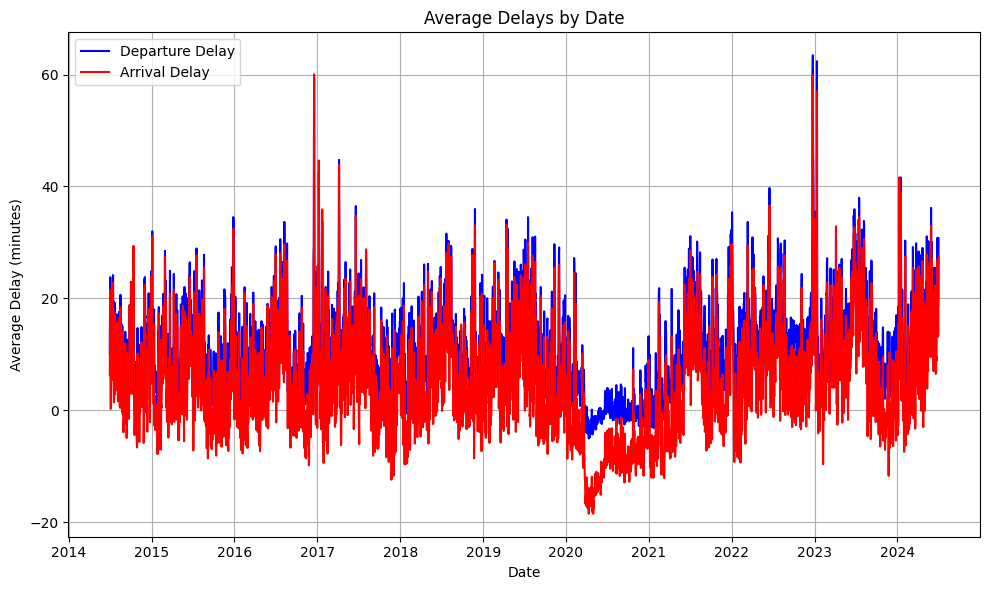

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Flight Date' to datetime format (replace with your column name)
flight_data['Flight Date'] = pd.to_datetime(flight_data['Flight Date'], errors='coerce')

# Group by 'Flight Date' and calculate the average delay for each day
delay_by_date = flight_data.groupby('Flight Date').agg({
    'Departure Delay': 'mean',
    'Arrival Delay': 'mean'
})

# Plot the average delays over time
plt.figure(figsize=(10, 6))
plt.plot(delay_by_date.index, delay_by_date['Departure Delay'], label='Departure Delay', color='blue')
plt.plot(delay_by_date.index, delay_by_date['Arrival Delay'], label='Arrival Delay', color='red')
plt.xlabel('Date')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delays by Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [122]:
flight_data = pd.read_csv('flight_data.csv')

In [125]:
flight_data.columns

Index(['Unnamed: 0', 'Flight Date', 'OP_UNIQUE_CARRIER', 'TAIL_NUM',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID',
       'DEST', 'DEST_CITY_NAME', 'Departure Time', 'Departure Delay',
       'TAXI_OUT', 'TAXI_IN', 'Arrival Time', 'Arrival Delay', 'CANCELLED',
       'CANCELLATION_CODE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Hour'],
      dtype='object')

In [16]:
# Convert 'Departure Time' to datetime format (replace with your column name)
flight_data['Departure Time'] = pd.to_datetime(flight_data['Departure Time'], format='%H:%M', errors='coerce')

# Extract the hour from 'Departure Time'
flight_data['Hour'] = flight_data['Departure Time'].dt.hour

# Group by hour of the day and calculate the average delay for each hour
delay_by_hour = flight_data.groupby('Hour').agg({
    'Departure Delay': 'mean',
    'Arrival Delay': 'mean'
})

# Plot the average delay by time of day
plt.figure(figsize=(10, 6))
plt.plot(delay_by_hour.index, delay_by_hour['Departure Delay'], label='Departure Delay', color='blue')
plt.plot(delay_by_hour.index, delay_by_hour['Arrival Delay'], label='Arrival Delay', color='red')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delays by Time of Day')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

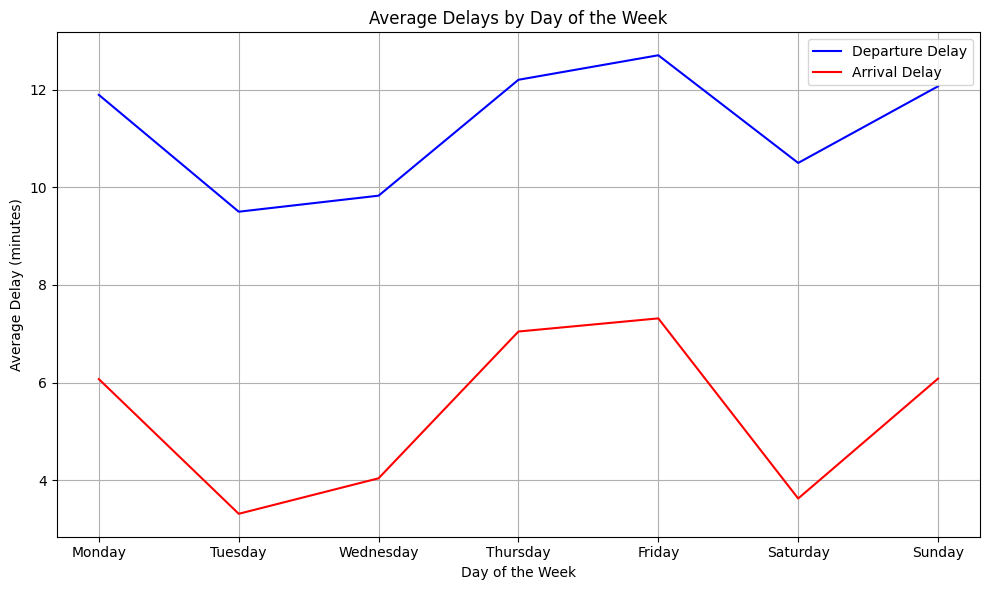

In [19]:
# Extract the day of the week from 'Flight Date'
flight_data['Day of Week'] = flight_data['Flight Date'].dt.day_name()

# Group by 'Day of Week' and calculate the average delay for each day
delay_by_day = flight_data.groupby('Day of Week').agg({
    'Departure Delay': 'mean',
    'Arrival Delay': 'mean'
})

# Sort the days of the week in the correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
delay_by_day = delay_by_day.reindex(days_order)

# Plot the average delay by day of the week
plt.figure(figsize=(10, 6))
plt.plot(delay_by_day.index, delay_by_day['Departure Delay'], label='Departure Delay', color='blue')
plt.plot(delay_by_day.index, delay_by_day['Arrival Delay'], label='Arrival Delay', color='red')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delays by Day of the Week')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


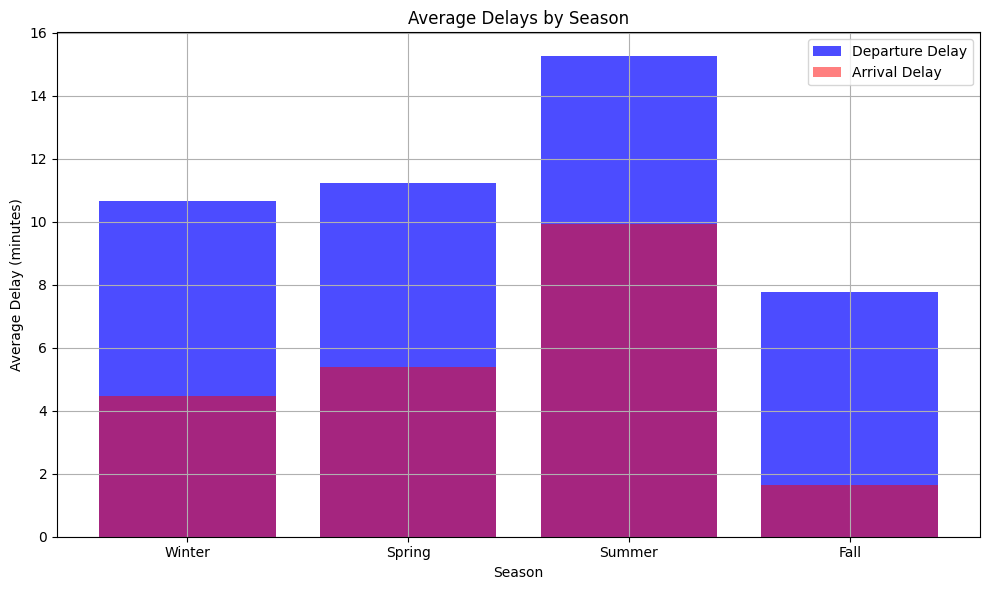

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the flight data is already loaded into the DataFrame 'flight_data'
# Replace 'Flight Date' with the actual column name containing the date

# Convert 'Flight Date' to datetime format
flight_data['Flight Date'] = pd.to_datetime(flight_data['Flight Date'], errors='coerce')

# Extract the month from 'Flight Date'
flight_data['Month'] = flight_data['Flight Date'].dt.month

# Define a function to assign seasons based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the 'get_season' function to create a new 'Season' column
flight_data['Season'] = flight_data['Month'].apply(get_season)

# Group by 'Season' and calculate the average delay for each season
delay_by_season = flight_data.groupby('Season').agg({
    'Departure Delay': 'mean',
    'Arrival Delay': 'mean'
})

# Ensure all seasons are included in the plot, even if some have no data
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
delay_by_season = delay_by_season.reindex(seasons)

# Plot the average delay by season
plt.figure(figsize=(10, 6))
plt.bar(delay_by_season.index, delay_by_season['Departure Delay'], label='Departure Delay', color='blue', alpha=0.7)
plt.bar(delay_by_season.index, delay_by_season['Arrival Delay'], label='Arrival Delay', color='red', alpha=0.5)
plt.xlabel('Season')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delays by Season')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
